# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Marina Hu
- Allison Huang
- Samuel Lee
- Audrey Liang
- Lilian Xia 

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

We want to figure out the following question for this project: 

- Are we able to predict the rise or fall of crime rates based on the rise or fall of COVID-19 rates and effects?

To do so, here are some of the variables we will be looking at (on a county by county basis in California):
- Violent crime rates from around the years March 2020- March 2022
- Hospitalization rates
- Vaccination Rates
- COVID cases

## Background and Prior Work

The COVID-19 pandemic has had numerous effects in many aspects of life, from social connections to physical and mental health. Among its less apparent interpersonal and political impacts are those on crime rates. Existing research and analyses reveal a comprehensive picture: while the pandemic has led to substantial shifts in crime rates compared to pre-pandemic times, the direction and scale of these changes vary depending on the type of crime. Our research aims to investigate these dynamics, particularly focusing on the trends in violent crime rates in correlation with various COVID-19 data in California. 

The Centers for Disease Control and Prevention (CDC) and FBI both reported a striking 30 percent increase in the number of homicides in the U.S. from 2019 to 2020, marking the largest single-year increase on record.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) According to a study by the Council on Criminal Justice (CCJ), this surge likely stemmed from a combination of factors, including the pandemic and social unrest.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) This study also highlights increases in aggravated and gun assaults and motor vehicle thefts, juxtaposed with declines in residential and non-residential burglaries, larcenies, and drug offenses. Recent data reveals that there was a significant 2% decline in violent crime in the U.S., approaching pre-pandemic rates.<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4) However, these studies note that it is unclear if these fluctuations in crime rate can be attributed to the pandemic. In our project, we aim to analyze COVID-19 data to see if there are significant correlations that can potentially help explain and predict these trends.

More specifically, we focus on analyzing data in California as findings reveal a notable widening of the gap between the state’s violent crime rates and the national average during the pandemic.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) This disparity increased significantly from 15% in 2019 to 31% in 2022. Surprisingly, this surge is not correlated with the national increase in homicide rates but rather due to a rise in aggravated assaults within the state. Moreover, the Public Policy Institute of California indicates that the violent crime rates across counties varies, with 36 out of 58 witnessing a surge in 2022, 13 of which increasing by 20% or more. With this research, we’re interested in further analyzing violent crime rates in California to identify potential correlations with COVID-19. Are the shifts in crime rate truly attributed to the pandemic or merely an overlap in timing? Moreover, are these correlations consistent across the state or confined to specific counties? To answer these questions, we look at three major indicators of COVID-19: hospitalization rates, overall cases, and vaccination rates. Going a step further, we want to see if we can potentially predict the rise or fall of violent crime rates given the upward or downward trends of the pandemic.

1. <a name="cite_note-1"></a> Lofstrom, M., & Martin, B. (2023, October). Crime Trends in California. Public Policy Institute of California. https://www.ppic.org/publication/crime-trends-in-california/ 
2. <a name="cite_note-2"></a> Northeastern University Public Affairs. (2023, January 27). How COVID-19 Changed Crime in the U.S.. https://publicaffairs.northeastern.edu/articles/us-crime-rate-during-pandemic/ 
3. <a name="cite_note-3"></a> Rosenfeld, R., & Lopez Jr., E. (2021, May 21). Pandemic, Social Unrest, And Crime in U.S. Cities: March 2021 Update. Council on Criminal Justice. https://counciloncj.org/impact-report-covid-19-and-crime/ 
4. <a name="cite_note-4"></a> Salter, J. (2023, October). Violent Crime Decreases to Pre-Pandemic Levels: FBI Report. TIME USA. https://time.com/6324381/violent-crime-decreases-pre-pandemic-levels-fbi/ 


# Hypothesis


We hypothesize that COVID-19's effect on the public's health will be reflected in the violent crime rates. We believe there is a relationship between counties more heavily impacted by COVID-19 and rising serious crime rates. 

# Data and Setup

## Data overview

- Dataset #1
  - Dataset Name: California Crime Rates by County
  - Link to the dataset: https://openjustice.doj.ca.gov/data, under Crime and Clearances Monthly CSV
  - Number of observations: 350
  - Number of variables: 12
- Dataset #2 
  - Dataset Name: COVID-19 Time-Series Metrics by County and State
  - Link to the dataset: https://catalog.data.gov/dataset/covid-19-time-series-metrics-by-county-and-state-e7757
  - Number of observations: 86559
  - Number of variables: 12
- Dataset #3 
  - Dataset Name: Statewide Covid-19 Hospital County Data
  - Link to the dataset: https://data.ca.gov/dataset/covid-19-hospital-data/resource/e34f966b-39dc-4f86-8087-2f9b327f60f3
  - Number of observations: 79554
  - Number of variables: 10
- Dataset #4
  - Dataset Name: Covid-19 Vaccines Counts by County
  - Link to the dataset: https://data.ca.gov/dataset/covid-19-vaccine-progress-dashboard-data/resource/317f8cd8-7225-4b7e-99d1-6ea441043a51
  - Number of observations: 9195
  - Number of variables: 10 

For this project, we decided to restrict each dataset to the top 15 most populated counties in California to make it easier to analyze potential relationships between the variables. These counties are likely to exhibit more distinct patterns in both COVID-19 and crime rates and also typically have more accurate up-to-date data because they are the major urban/suburban centers. Thus, they will likely have greater impact on the state's overall trends and dynamics. Working with a smaller subset of counties also reduces the data complexity and makes it easier to manage, interpret, and communicate findings of the data. 

These 15 counties are: Los Angeles County, San Diego County, Orange County, Riverside County, San Bernardino County, Santa Clara County, Alameda County, Sacramento County, Contra Costa County, Fresno County, Kern County, San Franscisco County, Ventura County, San Joaquin County, and San Mateo County (Source: https://www.california-demographics.com/counties_by_population).

In [5]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

import statsmodels.api as sm
import patsy 

# setting
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

## California Crime Rates by County Dataset

- Description:
    - The dataset below is from the California Department of Justice and contains criminal justice data across all the counties in California between March 2020 to March 2022.

- Variables and their datatypes:
    - **county** (object): The county in California for which the crime was reported for. This is important to group each dataset properly.
    - **year_month** (object): The year and month for which the data was reported for a county. This is important in order to properly merge and group other datasets by date.
    - **Violent_sum, Homicide_sum, ForRape_sum, Robbery_sum, AggAssault_sum** (int64): hese are the types of crimes that were committed in this county for a specific month and year. These can be used to represent the crime rate per county. The Violent_sum column is a sum of the Homicide, ForRape, Robbery, and AggAssault columns. 
- Concepts:
    - This dataset can give us a comprehensive outlook on the crime data per each county in the top fifteen counties of California. By viewing this data, we are able to see which counties have the highest crime rates, as well as their trends during the COVID-19 pandemic. 
- Wrangling/Cleaning/Preprocessing the dataset:
    - In our data wrangling, we first took the timeframe we wanted, which was from March 2020 to March 2022. Then, we filtered the data to take only the top 15 counties based on population, and then dropped all columns besides those related to the `Violent_sum` column, which are those listed above. Then, in order to merge with the COVID dataset later, we merged the `year` and `month` categories into one, `year_month`. 

In [6]:
counties = ['Los Angeles County' , 'San Diego County' , 'Orange County' , 'Riverside County' , 'San Bernardino County' , 'Santa Clara County', 'Alameda County', 'Sacramento County', 'Contra Costa County', 'Fresno County', 'Kern County', 'Ventura County',  'San Joaquin County', 'San Francisco County', 'San Mateo County']
obj_cols = ['Violent_sum','Homicide_sum','ForRape_sum','Robbery_sum','AggAssault_sum','Property_sum','Burglary_sum','VehicleTheft_sum','LTtotal_sum']
crime_df = pd.read_csv('CrimeData.csv', low_memory= False)

# replacing all empty strings with 0 to get rid of converting empty strings to ints
crime_df[obj_cols] = crime_df[obj_cols].replace(" ", '0').astype(int)

crime_df = crime_df[crime_df['County'].isin(counties)].drop('NCICCode', axis=1)
crime_df['County'] = crime_df['County'].str.replace(' County', '')

# select rows between July 2020 - March 2022
crime_df = crime_df[crime_df['Year'] > 2019].iloc[2:14599,:8]
crime_df['year_month'] = crime_df['Year'].astype(str) + '-' + crime_df['Month'].astype(str).apply(lambda x: x.zfill(2))
crime_df = crime_df[crime_df['year_month'].between('2020-07', '2022-03')]
crime_df = crime_df.drop(['Month', 'Year'], axis= 1)


# sum up from each individual city
crime_df = crime_df.groupby(['County', 'year_month'], group_keys= True).sum().reset_index()
crime_df = crime_df.rename(columns={'County':'county'})

crime_df

,county,year_month,Violent_sum,Homicide_sum,ForRape_sum,Robbery_sum,AggAssault_sum
0,Alameda,2020-07,810,13,51,303,443
1,Alameda,2020-08,788,18,67,279,424
2,Alameda,2020-09,772,19,67,262,424
3,Alameda,2020-10,840,14,62,343,421
4,Alameda,2020-11,779,13,45,378,343
...,...,...,...,...,...,...,...
307,Ventura,2021-08,141,3,16,24,98
308,Ventura,2021-09,137,1,16,24,96
309,Ventura,2021-10,191,0,30,44,117
310,Ventura,2021-11,149,1,15,53,80


In [7]:
# checking for missing/null values in dataset
crime_df.isnull().sum()

county            0
year_month        0
Violent_sum       0
Homicide_sum      0
ForRape_sum       0
Robbery_sum       0
AggAssault_sum    0
dtype: int64

## California COVID-19 Cases by County Dataset

- Description: 
    - The dataset below is from to California Department of Public Health and contains data about the number of COVID-19 cases, deaths, and positive tests across all the counties in California between 2020-02-01 and 2023-12-19. 
- Variables and their datatypes:
    - **area** (object): The county/area the observation was taken in
    - **year_month** (object): The year and month for that row of data
    - **population** (float64): Total population for that county
    - **cases** (float64): Total number of COVID-19 cases, on average, for that month
    - **deaths** (float64): Total number of COVID-19 deaths, on average, for that month
    - **total_tests** (float64): Total tests taken, on average, during that month
    - **positive_tests** (float64): Total number of positive tests, on average, collected that month
- Concepts:
    - This dataset can give us the total number of cases, deaths, total tests, and positive tests in the selected counties for each date from 2020-02-01 to 2023-12-19. This, along with our other COVID-19 datasets, will help us determine if a county was more affected by COVID-19 than others and compare the impact relative to crime rates.
- Wrangling/Cleaning/Preprocessing the dataset:
    - In our data wrangling, we first pulled out all the data for our variables, counties, and dates of interest (as shown below). We also calculated the monthly average for each variable to make the data easier to work with, ultimately reducing the dataset down to 315 rows x 7 columns. Because we have multiple datasets for COVID-19, we execute the same process for all the COVID-19 datasets, eventually combining all of them into one dataframe to simplify and increase the efficiency of later analyses.

In [8]:
# counties and interested columns to analyze further into
counties = ['Los Angeles' , 'San Diego' , 'Orange' , 'Riverside' , 'San Bernardino' , 'Santa Clara', 'Alameda', 'Sacramento', 'Contra Costa', 'Fresno', 'Kern', 'Ventura',  'San Joaquin', 'San Francisco', 'San Mateo']
# note: interested_cols = ['area', 'year_month', 'population', 'cases', 'deaths', 'total_tests', 'positive_tests']

# loading/reading the initial dataframe
covid_cases_df = pd.read_csv('COVID19_Cases_Test.csv')
covid_cases_df = covid_cases_df[covid_cases_df['area'].isin(counties)].drop('area_type', axis=1)
covid_cases_df = covid_cases_df.dropna()

# select rows between July 2020 — March 2022, drop uninterested columns
covid_cases_df['date'] = pd.to_datetime(covid_cases_df['date'])
covid_cases_df = covid_cases_df[covid_cases_df['date'].between('2020-07-01', '2022-03-31')] 
covid_cases_df['year_month'] = covid_cases_df['date'].dt.year.astype(str) + '-' + covid_cases_df['date'].dt.month.astype(str).apply(lambda x: x.zfill(2))
covid_cases_df = covid_cases_df.drop(['cumulative_cases', 'cumulative_deaths', 'cumulative_total_tests', 'cumulative_positive_tests','date'], axis=1)

# group dataframe and calculate mean values
covid_cases_df = covid_cases_df.groupby(['area', 'year_month', 'population'], group_keys= True).mean().reset_index()

# rename 'area' column
covid_cases_df.rename(columns={'area': 'county'}, inplace=True)

covid_cases_df

,county,year_month,population,cases,deaths,total_tests,positive_tests
0,Alameda,2020-07,1685886.0,211.838710,1.870968,4465.709677,255.870968
1,Alameda,2020-08,1685886.0,172.903226,3.290323,4320.387097,214.387097
2,Alameda,2020-09,1685886.0,86.233333,2.566667,4892.500000,113.133333
3,Alameda,2020-10,1685886.0,85.000000,0.967742,6276.741935,98.806452
4,Alameda,2020-11,1685886.0,282.066667,1.300000,8347.266667,281.433333
...,...,...,...,...,...,...,...
310,Ventura,2021-11,852747.0,81.666667,0.566667,4546.033333,104.700000
311,Ventura,2021-12,852747.0,538.612903,1.064516,5813.806452,626.935484
312,Ventura,2022-01,852747.0,1573.516129,4.419355,9629.354839,2122.354839
313,Ventura,2022-02,852747.0,201.178571,3.892857,4832.142857,318.464286


In [9]:
# checking for missing/null values in dataset
covid_cases_df.isnull().sum()

county            0
year_month        0
population        0
cases             0
deaths            0
total_tests       0
positive_tests    0
dtype: int64

In [10]:
# calculating the proportions for each of the variables

var_columns = ['cases', 'deaths',
       'total_tests', 'positive_tests']


monthly_average_prop = covid_cases_df.copy()

for col in var_columns:
    proportion = monthly_average_prop[col]/monthly_average_prop['population']
    
    # determine the position to insert the new column
    existing_column_position = monthly_average_prop.columns.get_loc(col) 

    # insert the new column after 'existing_column'
    monthly_average_prop.insert(existing_column_position + 1, ('proportion of ' + col), proportion)
    

monthly_average_prop

,county,year_month,population,cases,proportion of cases,deaths,proportion of deaths,total_tests,proportion of total_tests,positive_tests,proportion of positive_tests
0,Alameda,2020-07,1685886.0,211.838710,0.000126,1.870968,1.109783e-06,4465.709677,0.002649,255.870968,0.000152
1,Alameda,2020-08,1685886.0,172.903226,0.000103,3.290323,1.951687e-06,4320.387097,0.002563,214.387097,0.000127
2,Alameda,2020-09,1685886.0,86.233333,0.000051,2.566667,1.522444e-06,4892.500000,0.002902,113.133333,0.000067
3,Alameda,2020-10,1685886.0,85.000000,0.000050,0.967742,5.740257e-07,6276.741935,0.003723,98.806452,0.000059
4,Alameda,2020-11,1685886.0,282.066667,0.000167,1.300000,7.711079e-07,8347.266667,0.004951,281.433333,0.000167
...,...,...,...,...,...,...,...,...,...,...,...
310,Ventura,2021-11,852747.0,81.666667,0.000096,0.566667,6.645191e-07,4546.033333,0.005331,104.700000,0.000123
311,Ventura,2021-12,852747.0,538.612903,0.000632,1.064516,1.248338e-06,5813.806452,0.006818,626.935484,0.000735
312,Ventura,2022-01,852747.0,1573.516129,0.001845,4.419355,5.182492e-06,9629.354839,0.011292,2122.354839,0.002489
313,Ventura,2022-02,852747.0,201.178571,0.000236,3.892857,4.565079e-06,4832.142857,0.005667,318.464286,0.000373


In [11]:
monthly_average_prop.isnull().sum()

county                          0
year_month                      0
population                      0
cases                           0
proportion of cases             0
deaths                          0
proportion of deaths            0
total_tests                     0
proportion of total_tests       0
positive_tests                  0
proportion of positive_tests    0
dtype: int64

## California COVID-19 Hospitalization by County Dataset

- Description: 
    - The dataset below is from the California Department of Public Health and contains data about hostipitalization related to COVID across all the counties in California between 2020-03-27 and 2024-02-17. 
- Variables and their datatypes:
    - **county** (object): The county/area the observation was taken in
    - **year_month** (object): The year and month for that row of data.
    - **hospitalized_covid_patients** (float64): The number of patients currently hospitalized in an inpatient bed who have suspected or confirmed COVID.
    - **all_hospital_beds** (float64): Total number of beds in the facility, including all surge beds, inpatient and outpatient post-surgical beds, labor and delivery unit beds, and observation beds.
    - **icu_covid_confirmed_patients** (float64): The number of laboratory-confirmed positive COVID patients that are in the ICU at the hospital.
    - **icu_available_beds** (float64): The number of ICU beds available at the hospital.
- Concepts:
    - This dataset can give us the general condition of COVID hospitalization, which is one of the variables that can help us determine if a county was more affected by COVID-19 than others and compare the impact relative to crime rates.
- Wrangling/Cleaning/Preprocessing the dataset:
    - In our data wrangling, we first removed "_id" column because it is the same as the index, and then we converted "todays_date" into pd.Timestamp datatype for us to select the time range we want. Then, we extracted the data for our variables, counties, and dates of interest.

In [12]:
hospital_df = pd.read_csv('covid19_hospitalization.csv')

# drop id column
hospital_df = hospital_df.drop('_id', axis=1)

# change the date column to pd.datetime
hospital_df["todays_date"] = pd.to_datetime(hospital_df["todays_date"])

# select rows between July 2020 — March 2022
hospital_df = hospital_df[hospital_df['todays_date'].between('2020-07-01', '2022-03-31')]

# select rows with the following counties
counties_2 = [county.replace(" County", "") for county in counties]
hospital_df = hospital_df[hospital_df['county'].isin(counties_2)].reset_index(drop=True)

hospital_df = hospital_df[['county', 'todays_date', 'hospitalized_covid_patients', 'all_hospital_beds', 'icu_covid_confirmed_patients', 'icu_available_beds']]
hospital_df['year_month'] = hospital_df['todays_date'].dt.to_period('M').astype(str)
hospital_df = hospital_df.drop(['todays_date'], axis=1).groupby(['county', 'year_month']).sum().round(2).reset_index()

hospital_df

,county,year_month,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_available_beds
0,Alameda,2020-07,6742.0,84000.0,1631.0,3701.0
1,Alameda,2020-08,7234.0,74264.0,1874.0,2764.0
2,Alameda,2020-09,4667.0,71856.0,1046.0,3348.0
3,Alameda,2020-10,3150.0,74370.0,599.0,3701.0
4,Alameda,2020-11,4137.0,74421.0,769.0,3139.0
...,...,...,...,...,...,...
310,Ventura,2021-11,1282.0,35038.0,210.0,1013.0
311,Ventura,2021-12,2183.0,37158.0,384.0,764.0
312,Ventura,2022-01,9132.0,37482.0,1425.0,770.0
313,Ventura,2022-02,5211.0,33037.0,859.0,841.0


In [13]:
# checking for missing/null values in dataset
hospital_df.isnull().sum() / len(hospital_df)

county                          0.0
year_month                      0.0
hospitalized_covid_patients     0.0
all_hospital_beds               0.0
icu_covid_confirmed_patients    0.0
icu_available_beds              0.0
dtype: float64

## California Covid-19 Vaccines Counts by County Dataset

- Description:
    - The dataset below is from the California Department of Public Health and contains data about COVID-19 vaccinations across all the counties in California between 2020-03-27 and 2024-02-17.
- Variables and their datatypes:
    - **county** (object):
    - **year_month** (object):
    - **fully_vaccinated** (int64):
    - **cumulative_fully_vaccinated** (int64):
- Concepts:
    -  This dataset can give us the total number of COVID-19 vaccinations, which is one of the variables that can help us determine if a county was more affected by COVID-19 than others and compare the impact relative to crime rates.
- Wrangling/Cleaning/Preprocessing the dataset:
    - In our data wrangling, we first extracted the data for our variables, counties, and dates of interest. Then, 

In [14]:
vaccine_df = pd.read_csv('covid19vaccinesbycounty.csv')

# include only the 15 counties in df
vaccine_df = vaccine_df[vaccine_df['county'].isin(counties)]
vaccine_df['administered_date'] = pd.to_datetime(vaccine_df['administered_date'])

# select rows between July 2020 — March 2022
vaccine_df = vaccine_df[vaccine_df['administered_date'].between('2020-07-01', '2022-03-31')].reset_index(drop=True)

# only keeping the informative columns 
vaccine_df = vaccine_df[['county', 'administered_date', 'fully_vaccinated', 'cumulative_fully_vaccinated']]

# split the adminstered_date into year and month for merging the data later on
vaccine_df['year_month'] = vaccine_df['administered_date'].dt.to_period('M').astype(str)

# rearrange the information
vaccine_df = vaccine_df.groupby(['county', 'year_month']).agg({"fully_vaccinated": "sum", "cumulative_fully_vaccinated":"last"}).reset_index()

vaccine_df

,county,year_month,fully_vaccinated,cumulative_fully_vaccinated
0,Alameda,2020-07,0,0
1,Alameda,2020-08,2,2
2,Alameda,2020-09,38,40
3,Alameda,2020-10,6,46
4,Alameda,2020-11,6,52
...,...,...,...,...
310,Ventura,2021-11,12315,566698
311,Ventura,2021-12,18248,584946
312,Ventura,2022-01,12934,597880
313,Ventura,2022-02,9360,607240


In [15]:
# checking for missing/null values in dataset
vaccine_df.isnull().sum()

county                         0
year_month                     0
fully_vaccinated               0
cumulative_fully_vaccinated    0
dtype: int64

## Merge all datasets into one:

For ease of analysis, we decided to merge all of the datasets into one, joining them by the coloumns `county` and `year_month`. This reduces the complexity of data handling and ensures that all data are aligned based on the same time intervals and counties.

Additionally, counties vary widely in population size, so directly comparing absolute numbers can be misleading. For example, Los Angeles is likely to have higher rates of both COVID-19 and crime due to its higher population density. Thus, we normalize the data by calculating the proportion of each column/variable relative to the population of its respective county. This allows us to more accurately assess trends and patterns on a comparable scale.

In [16]:
# merge covid cases, covid hospitalization, and crime rate datasets
data = pd.merge(covid_cases_df[['county', 'year_month', 'population', 'cases', 'deaths', 'positive_tests']],
                hospital_df[['county', 'year_month', 'hospitalized_covid_patients']],
                how='inner',
                on=['county', 'year_month'])
data = pd.merge(data, vaccine_df[['county', 'year_month', 'fully_vaccinated']],
                how='inner',
                on=['county', 'year_month'])
data = pd.merge(data, crime_df[['county', 'year_month', 'Violent_sum']], 
                how='inner', 
                on=['county', 'year_month'])


# calculating the proportions for each of the variables in merged dataframe
data_columns = ['cases', 'deaths', 'positive_tests', 'hospitalized_covid_patients', 'fully_vaccinated', 'Violent_sum']
for col in data_columns:
    proportion = data[col]/data['population']
    
    # Determine the position to insert the new column
    existing_column_position = data.columns.get_loc(col)  

    # Insert the new column after 'existing_column'
    data.insert(existing_column_position + 1, ('proportion of ' + col), proportion)
    
    
# calculate percent change in covid and crime 
data = data.sort_values(by = ['county', 'year_month'])
summed = ['cases','deaths', 'positive_tests', 'hospitalized_covid_patients']

data['percent_change_covid'] = data[summed].sum(axis = 1).div(4, axis = 0)
data['percent_change_covid'] = data.groupby('county')['percent_change_covid'].pct_change()

data['percent_change_crime'] = data.groupby('county')['Violent_sum'].pct_change()
data = data.dropna()

data

,county,year_month,population,cases,proportion of cases,deaths,proportion of deaths,positive_tests,proportion of positive_tests,hospitalized_covid_patients,proportion of hospitalized_covid_patients,fully_vaccinated,proportion of fully_vaccinated,Violent_sum,proportion of Violent_sum,percent_change_covid,percent_change_crime
1,Alameda,2020-08,1685886.0,172.903226,0.000103,3.290323,1.951687e-06,214.387097,0.000127,7234.0,0.004291,2,0.000001,788,0.000467,0.057269,-0.027160
2,Alameda,2020-09,1685886.0,86.233333,0.000051,2.566667,1.522444e-06,113.133333,0.000067,4667.0,0.002768,38,0.000023,772,0.000458,-0.361416,-0.020305
3,Alameda,2020-10,1685886.0,85.000000,0.000050,0.967742,5.740257e-07,98.806452,0.000059,3150.0,0.001868,6,0.000004,840,0.000498,-0.315091,0.088083
4,Alameda,2020-11,1685886.0,282.066667,0.000167,1.300000,7.711079e-07,281.433333,0.000167,4137.0,0.002454,6,0.000004,779,0.000462,0.409931,-0.072619
5,Alameda,2020-12,1685886.0,765.645161,0.000454,7.096774,4.209522e-06,858.064516,0.000509,11381.0,0.006751,33,0.000020,848,0.000503,1.767410,0.088575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Ventura,2021-08,852747.0,212.032258,0.000249,1.806452,2.118391e-06,260.838710,0.000306,4001.0,0.004692,23104,0.027094,141,0.000165,2.017398,-0.250000
308,Ventura,2021-09,852747.0,133.833333,0.000157,1.866667,2.189004e-06,176.866667,0.000207,3433.0,0.004026,22922,0.026880,137,0.000161,-0.163129,-0.028369
309,Ventura,2021-10,852747.0,79.451613,0.000093,0.516129,6.052546e-07,101.870968,0.000119,1780.0,0.002087,14311,0.016782,191,0.000224,-0.476224,0.394161
310,Ventura,2021-11,852747.0,81.666667,0.000096,0.566667,6.645191e-07,104.700000,0.000123,1282.0,0.001503,12315,0.014442,149,0.000175,-0.251247,-0.219895


# Data Analysis and Results

## Exploratory Data Analysis

### Section 1 of EDA - Analysis of Crime Dataset

The first graph depicts the total amount of violent crimes proportional to their population for each year from 2020-2022, only from the dates specified (July 2020 - March 2022). 

The second graph depicts each county's violent crime rate per month instead of summed up. 

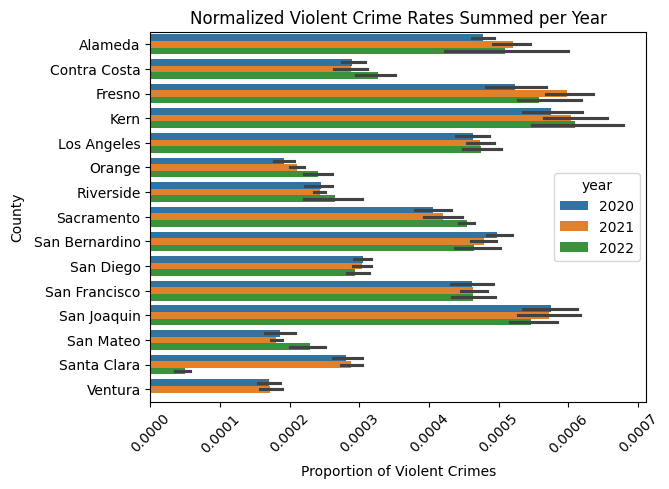

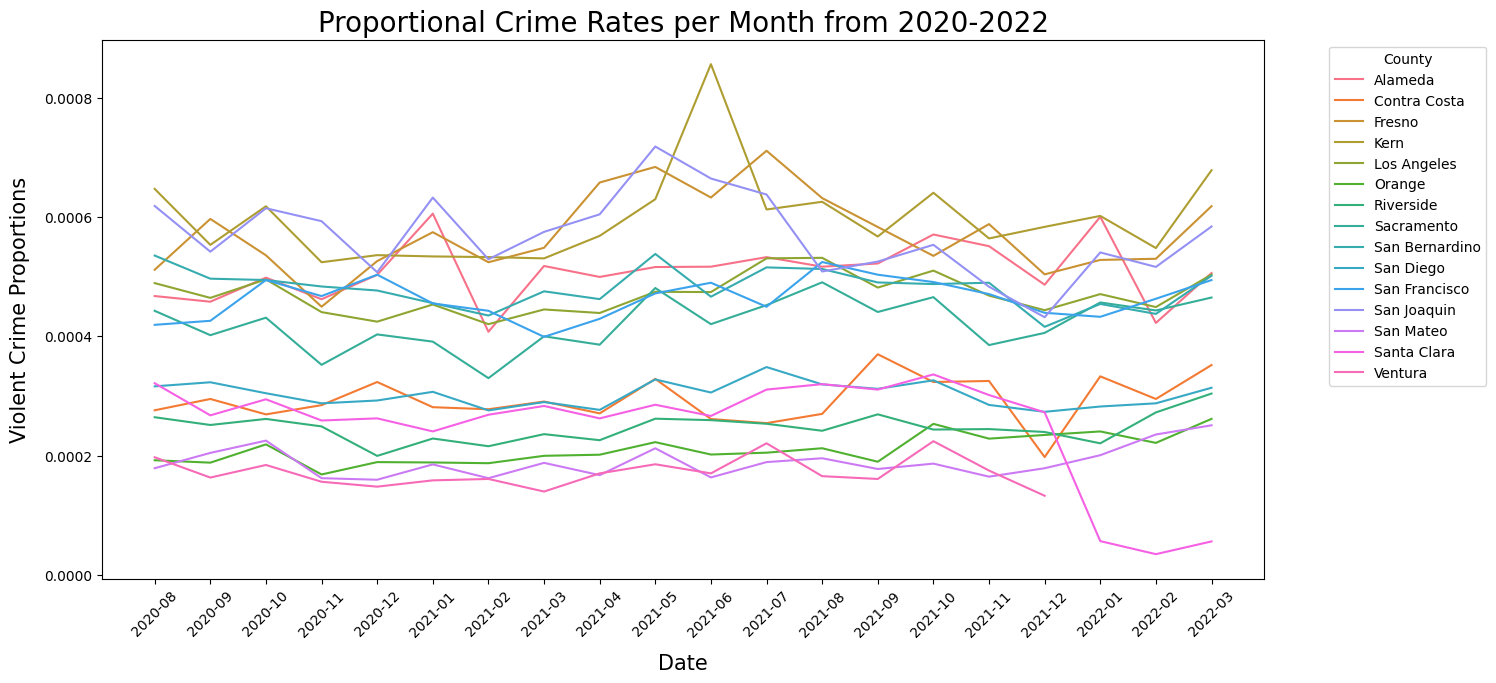

In [17]:
# normalize crime dataset
crime_df['year'] = crime_df['year_month'].str.split('-').str[0]
crime_df['violent_crime_proportion'] = crime_df['Violent_sum'] /  data['population']

# plot each county's normalized crime rates per year
sns.barplot(y='county', x='violent_crime_proportion', hue='year', data=crime_df)
plt.title('Normalized Violent Crime Rates Summed per Year')
plt.xlabel('Proportion of Violent Crimes', labelpad=7)
plt.ylabel('County', labelpad=7)
plt.xticks(rotation=45)

plt.show()

# plot each county's violent crime rate per month
plt.figure(figsize=(15, 7))
sns.lineplot(x='year_month', y='violent_crime_proportion', hue='county', data=crime_df)
plt.title('Proportional Crime Rates per Month from 2020-2022', fontsize=20)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('Violent Crime Proportions', fontsize=15, labelpad=10)
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Section 2 of EDA - Analysis of COVID-19 Cases Dataset

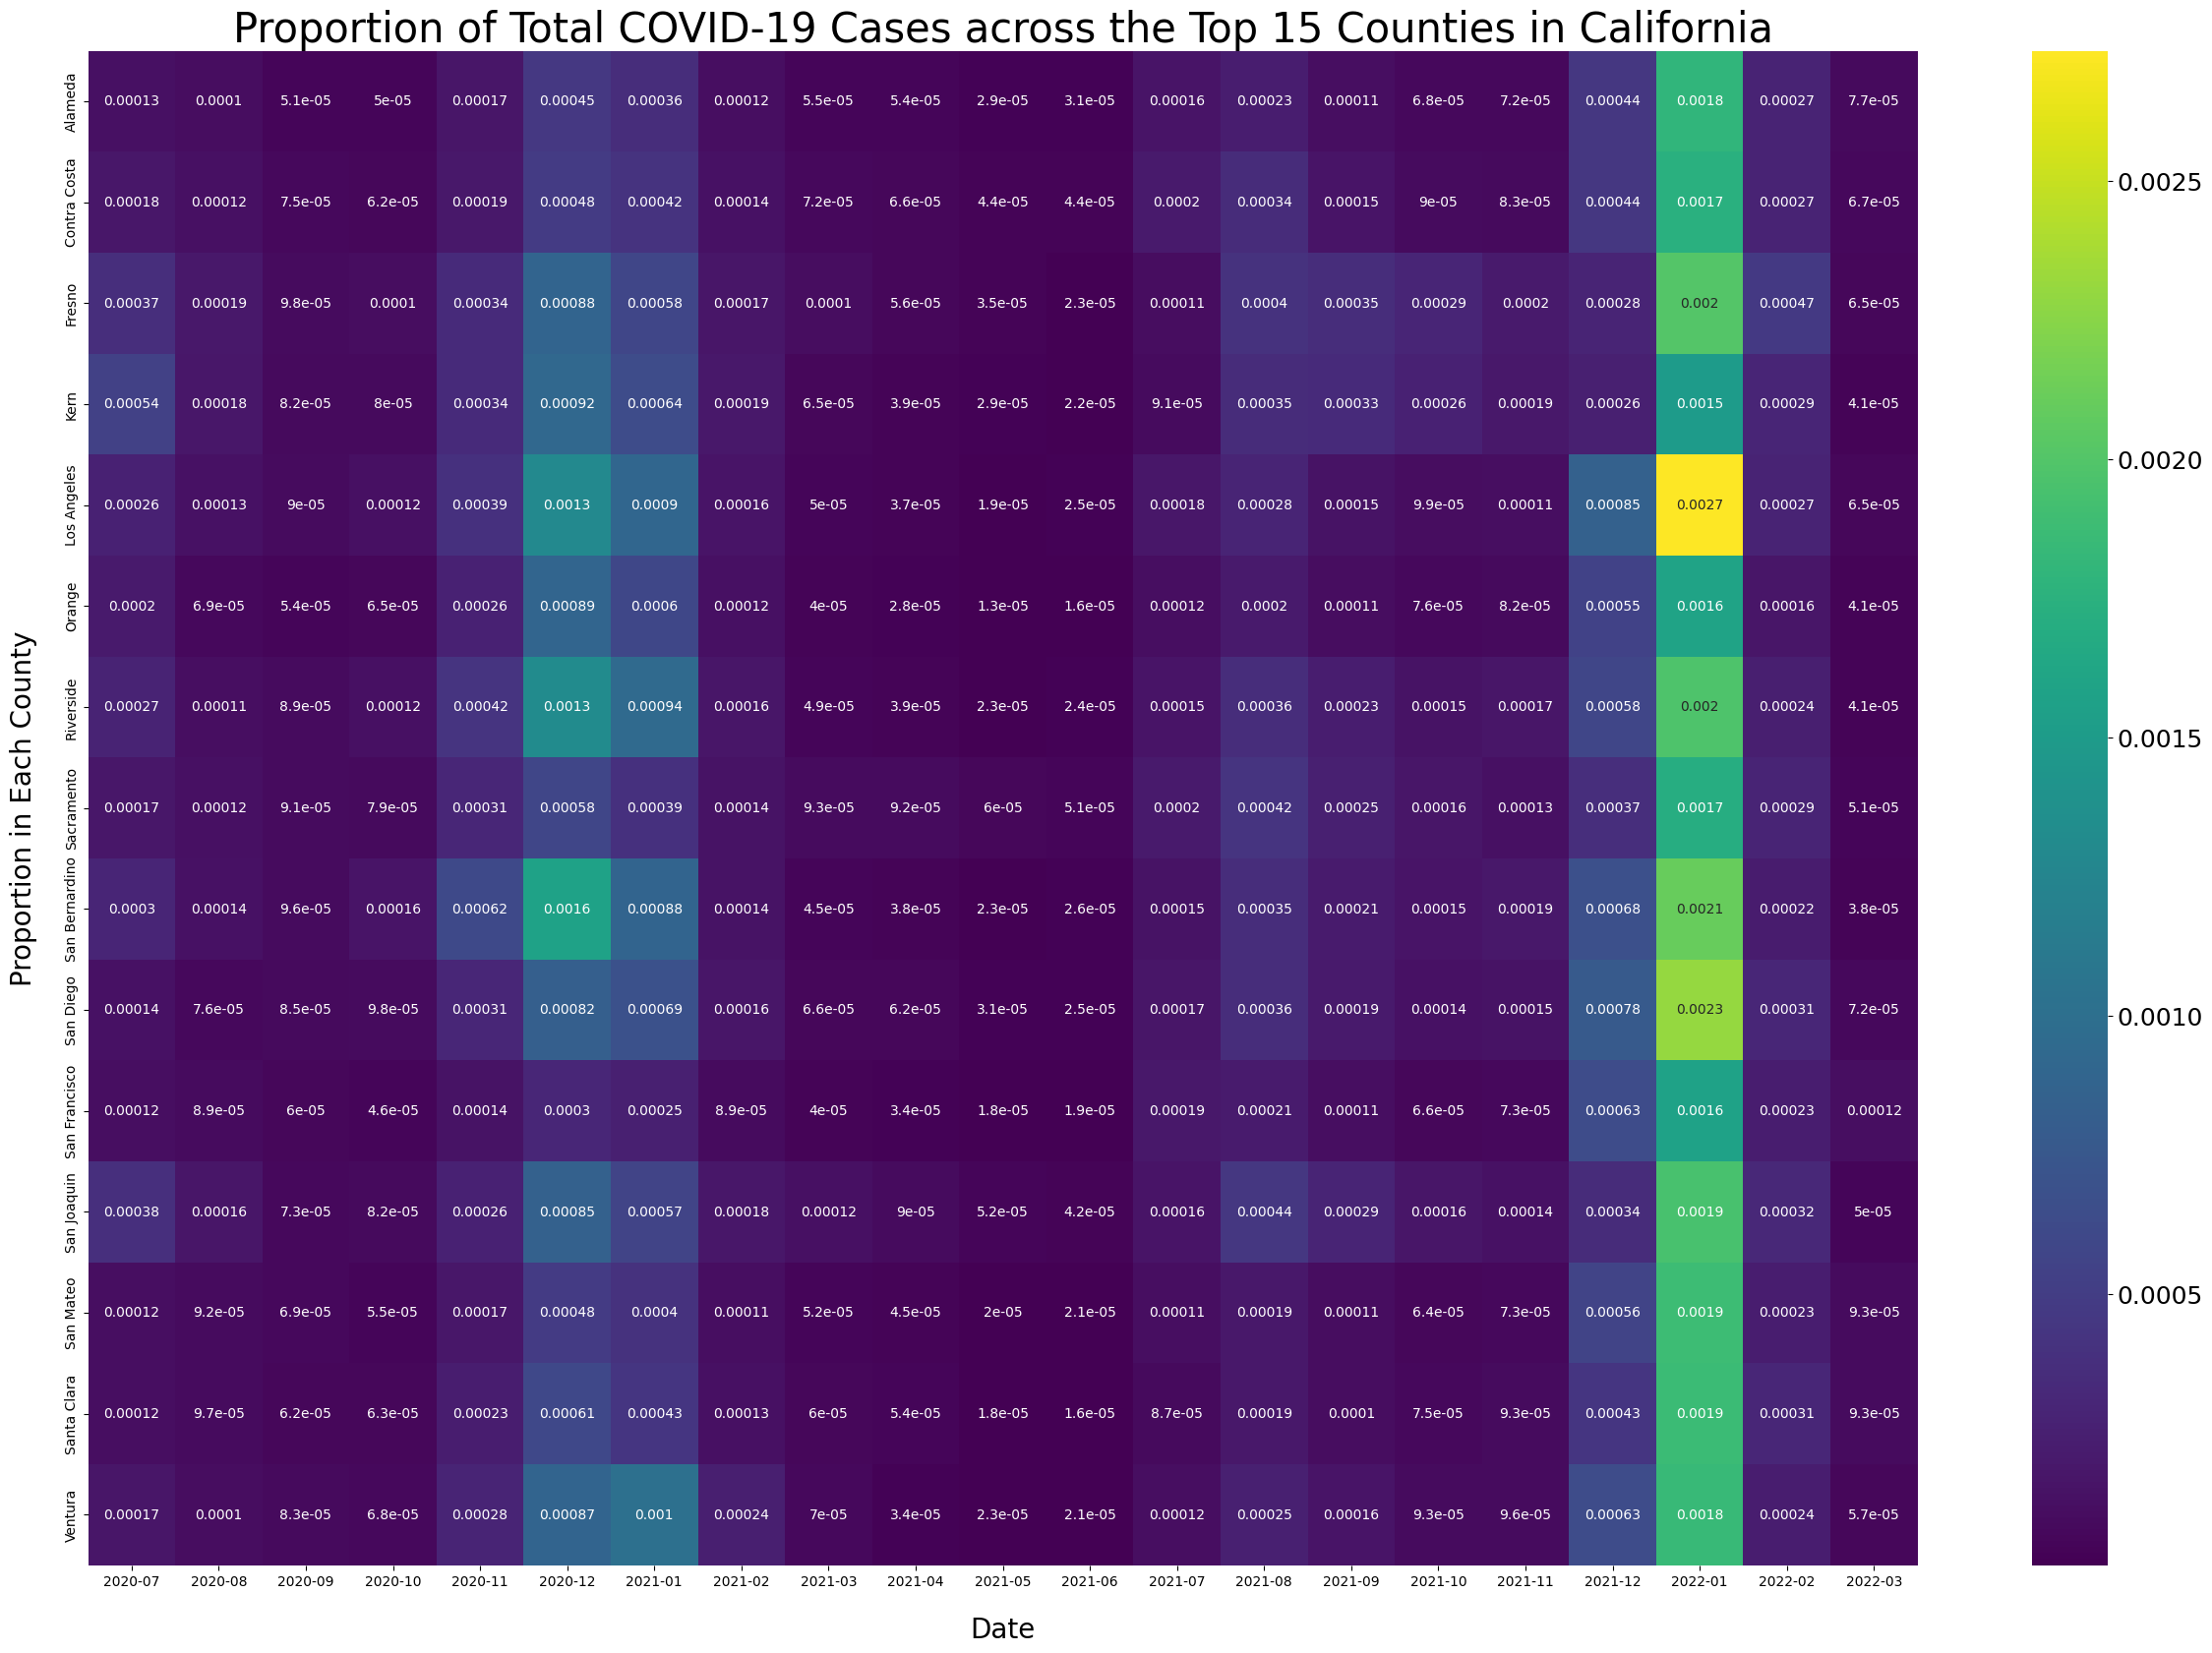

In [18]:
# generating a heatmap of data/time vs proportion of total COVID-19 cases
plt.figure(figsize=(30, 20))

# pivot the DataFrame to create a matrix suitable for a heatmap
heatmap_data = monthly_average_prop.pivot(index='county', columns='year_month', values='proportion of cases')

# plot the heatmap
heatmap_cases = sns.heatmap(data=heatmap_data, cmap='viridis', annot=True)
plt.title('Proportion of Total COVID-19 Cases across the Top 15 Counties in California', fontsize=30)
plt.xlabel('Date', fontsize=20, labelpad=20)
plt.ylabel('Proportion in Each County', fontsize=20, labelpad=20)

# access the color bar object and set font size for its ticks
colorbar = heatmap_cases.collections[0].colorbar
colorbar.ax.tick_params(labelsize=18)

plt.show()


The heatmap above depicts the dynamics of the proportion of total COVID-19 cases among the top 15 most populated counties in California. To compute this proportion, we determined the monthly average total COVID-19 cases for each county and divided it by the corresponding monthly average population of that county. This allows us to compare the spread of COVID-19 across regions with varying population densities.

Upon examining the heatmap, notable peaks in the proportion of total COVID-19 cases are observed in two months: December 2020 and January 2022. During these periods, all counties experienced a pronounced increase in the proportion of total cases. Counties such as Contra Costa, Kern, Orange, Sacramento, and San Francisco exhibited a comparatively slower rise in total COVID-19 cases throughout these months. Towards the later stages of the analyzed period, particularly nearing March 2022, Fresno, Los Angeles, Riverside, San Bernardino, and San Diego emerged as the most significantly impacted counties in terms of the proportion of total COVID-19 cases.

This observation underscores the dynamic nature of the pandemic, with fluctuations in case prevalence across different counties over time. 

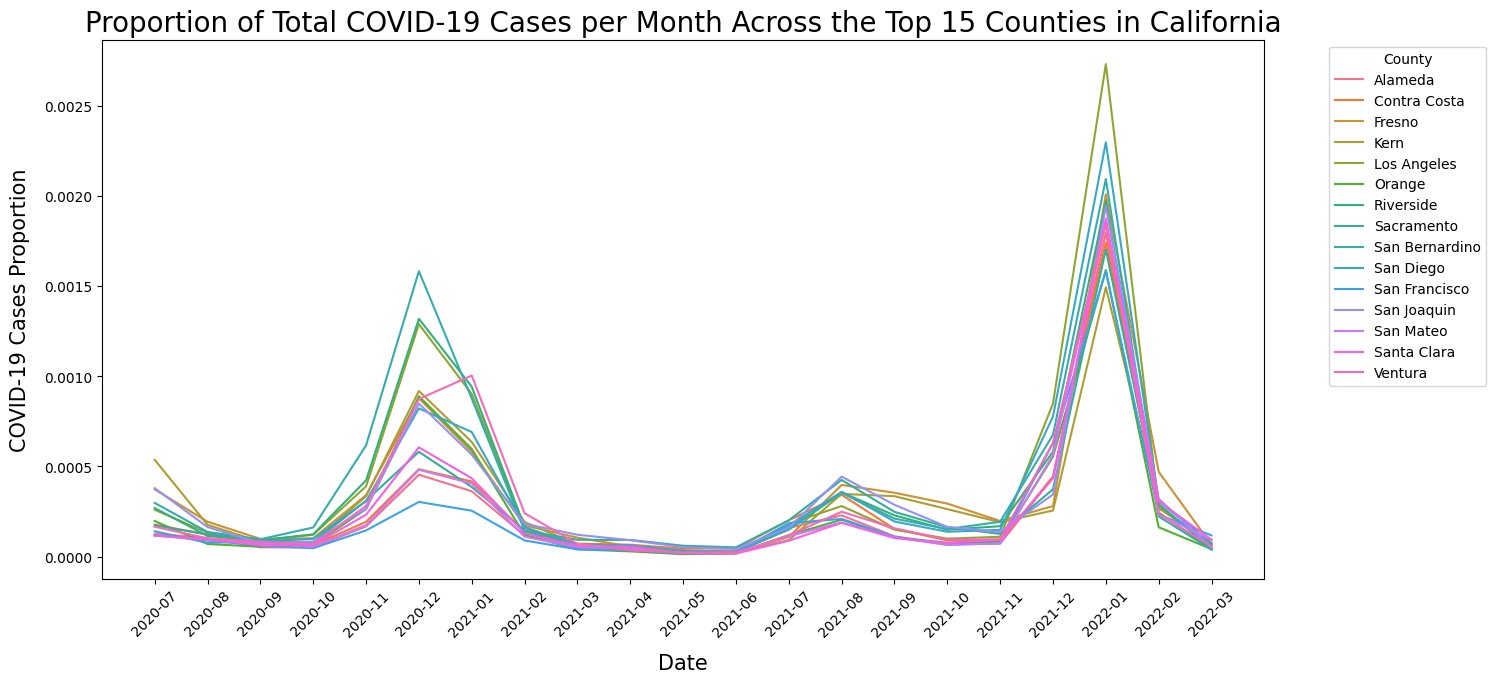

In [19]:
# plot each county's proportion of total COVID-19 cases per month
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_average_prop, x='year_month', y='proportion of cases', hue='county')
plt.title('Proportion of Total COVID-19 Cases per Month Across the Top 15 Counties in California', fontsize=20)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('COVID-19 Cases Proportion', fontsize=15, labelpad=10)
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


The line plot above illustrates the fluctuations in the proportion of total COVID-19 cases across the top 15 most populated counties in California. Proportions were calculated by dividing the monthly average total COVID-19 cases of each county by the corresponding monthly average population.

Examining the data through a line plot offers a clearer visualization of overall trends in the rise of total COVID-19 cases across these counties. Two distinct periods, from November 2020 to December 2020 and from December 2021 to January 2022, stand out with higher peaks, indicating a significant increase in the proportion of total COVID-19 cases across most counties.Interestingly, Ventura County shows its first notable peak in January 2021 rather than December 2020. Nonetheless, all counties exhibit a similar trend in the rise of the proportion of total COVID-19 cases over time.

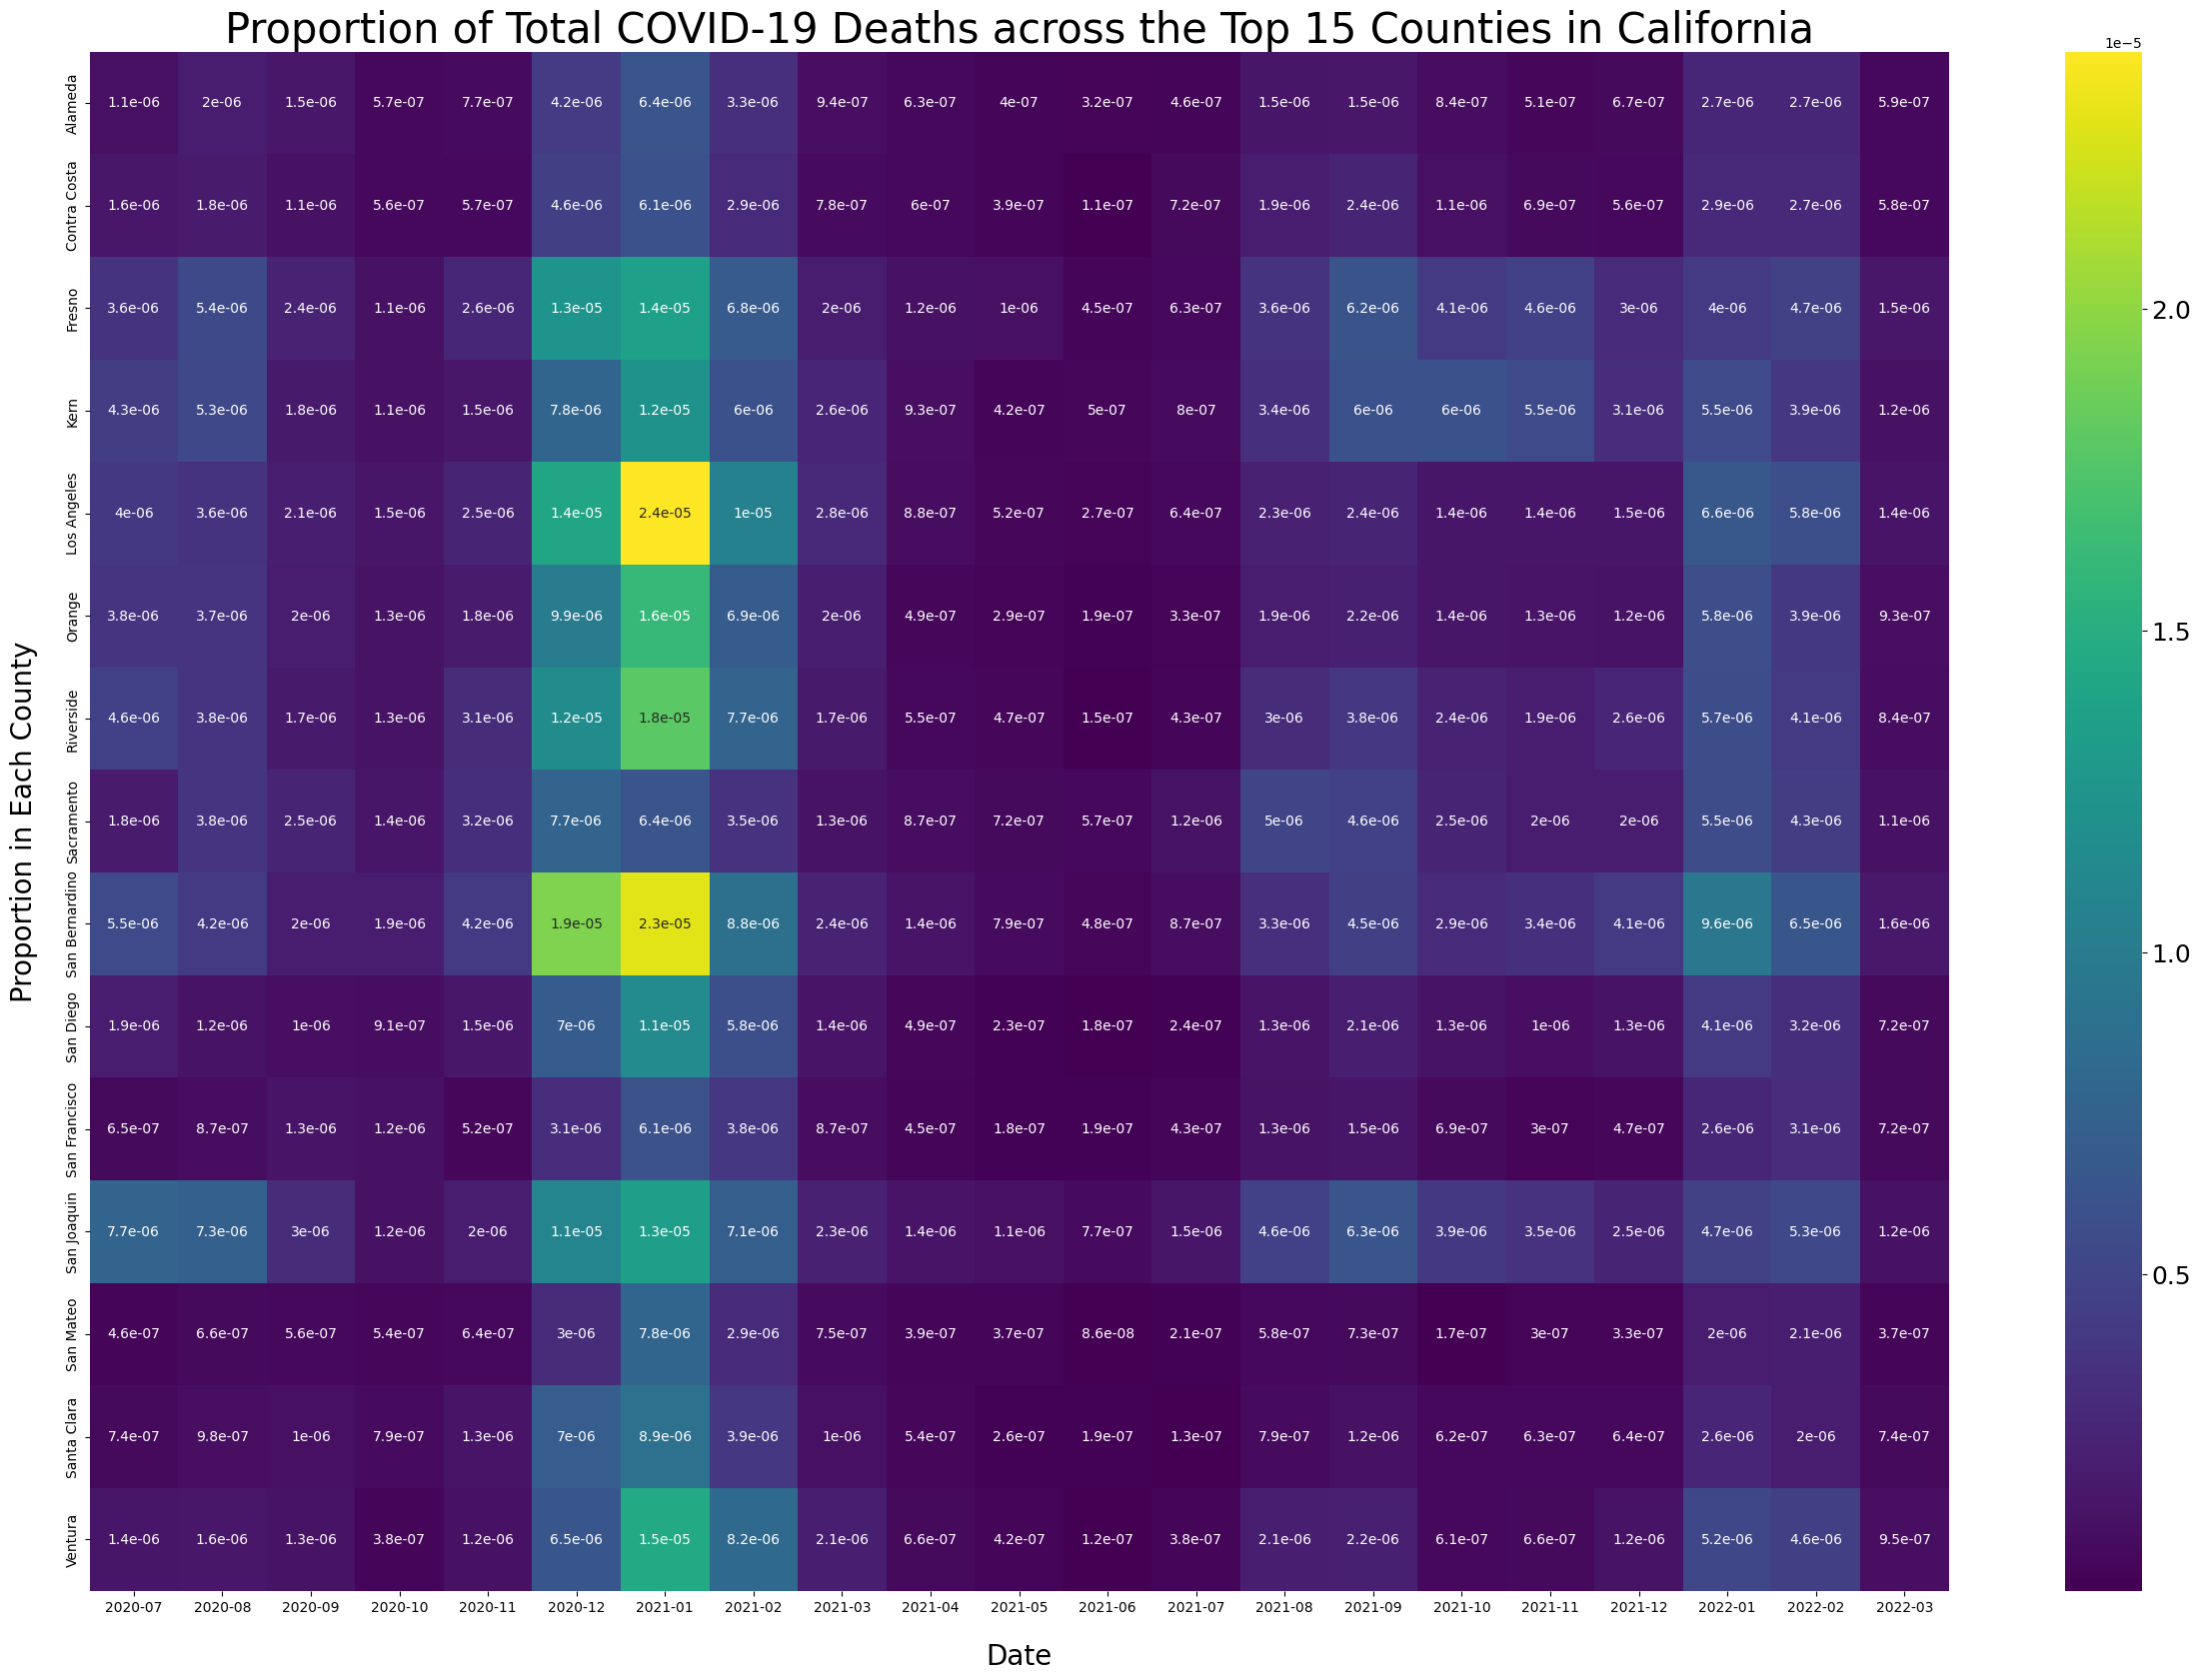

In [20]:
# generating a heatmap of date/time vs proportion of total COVID-19 deaths
plt.figure(figsize=(30, 20))

# pivot the DataFrame to create a matrix suitable for a heatmap
heatmap_data = monthly_average_prop.pivot(index='county', columns='year_month', values='proportion of deaths')

# plot the heatmap
heatmap_deaths = sns.heatmap(data=heatmap_data, cmap='viridis', annot=True)  
plt.title('Proportion of Total COVID-19 Deaths across the Top 15 Counties in California', fontsize=30)
plt.xlabel('Date', fontsize = 20, labelpad=20)
plt.ylabel('Proportion in Each County', fontsize = 20, labelpad=20)

# access the color bar object and set font size for its ticks
colorbar = heatmap_deaths.collections[0].colorbar
colorbar.ax.tick_params(labelsize=18)

plt.show()

The heatmap above illustrates the fluctuations in the proportion of total COVID-19 deaths across the top 15 most populated counties in California. To derive this proportion, we calculated the monthly average cumulative COVID-19 deaths for each county and divided it by the corresponding monthly average population of that county. This allows to us to effectively compare the impact of COVID-19 on communities with varying populations.

Upon examining the heatmap, a notable spike in the proportion of total deaths across all counties is evident in January 2021. Counties such as Alameda, Contra Costa, Sacramento, and San Francisco exhibited a relatively slower increase in total COVID-19 deaths compared to the rise in total cases during this period. Towards the later months, particularly in March 2022, the proportion of total deaths among all counties appeared to converge to similar, relatively low levels. However, some counties, including Fresno, Kern, Los Angeles, Sacramento, San Bernardino, and San Joaquin, maintained slightly higher proportions of total COVID-19 cases compared to others.

This observation suggests that while the initial spike in deaths affected all counties uniformly, there were variations in the rate of increase in total deaths compared to total cases across different counties. Additionally, towards the later stages of the analyzed period, certain counties consistently reported higher proportions of total cases, indicating potential ongoing challenges in managing the pandemic in those areas.

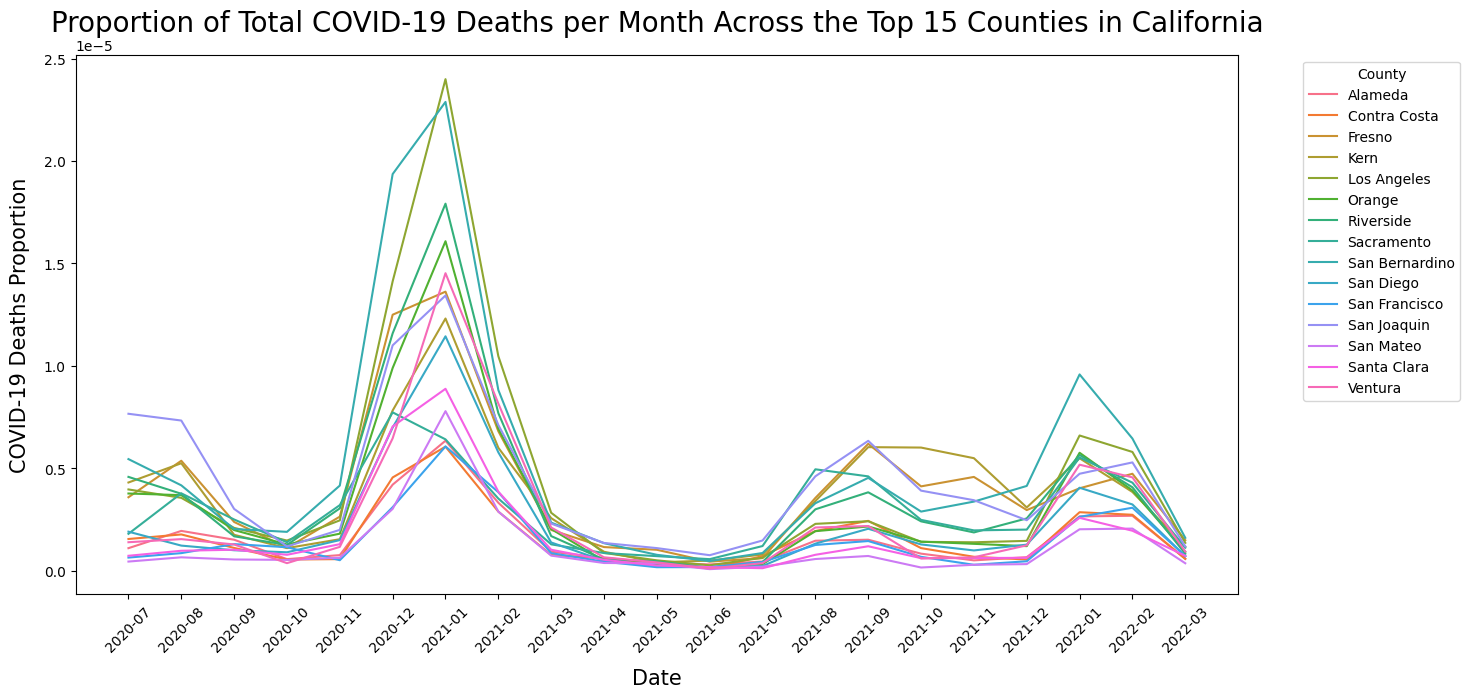

In [21]:
# plot each county's proportion of total COVID-19 deaths per month
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_average_prop, x='year_month', y='proportion of deaths', hue='county')
plt.title('Proportion of Total COVID-19 Deaths per Month Across the Top 15 Counties in California', fontsize=20)
plt.xlabel('Date', fontsize=15, labelpad=10)
plt.ylabel('COVID-19 Deaths Proportion', fontsize=15, labelpad=10)
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


The line plot above depicts changes in the proportion of total COVID-19 deaths across the top 15 most populated counties in California. Proportions were calculated by dividing the monthly average cumulative COVID-19 deaths of each county by the corresponding monthly average population.

A line plot provides a comprehensive visualization of trends in the rise of total COVID-19 deaths across these counties. Notably, a distinct peak in January 2021 is evident, where all counties experienced a higher proportion of COVID-19 deaths. Additionally, two other notable peaks occurred in August 2021 and December 2021, signifying periods of increased COVID-19 mortality rates. Despite these fluctuations, an overall similarity in the trend of rising proportions of total COVID-19 deaths is observed across all counties, similar to the pattern seen in cumulative COVID-19 cases. However, there appears to be more diversity or discrepancies among the counties when considering the proportion of total COVID-19 deaths compared to total COVID-19 cases.

### Section 3 of EDA - Analysis of COVID-19 Hospitilization Dataset
From the graph below we can see that regardless of the counties, the graph follows a similar trend

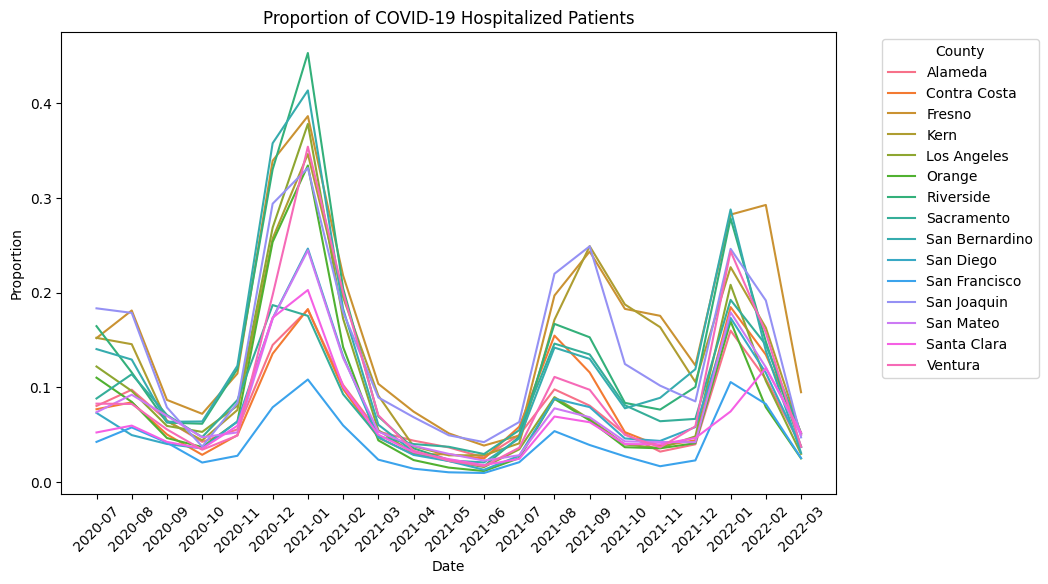

In [22]:
# Calculate the proportion
hospital_df['proportion'] = hospital_df['hospitalized_covid_patients'] / hospital_df['all_hospital_beds']
hospital_df['proportion'] = hospital_df['proportion'].apply(lambda x: x if x <= 1 else np.nan)
# Plot the proportion
plt.figure(figsize=(10, 6))
sns.lineplot(data=hospital_df, x='year_month', y='proportion', hue='county')
plt.title('Proportion of COVID-19 Hospitalized Patients')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Section 4 of EDA - Analysis of COVID-19 Vaccination Dataset

We decided to drop the vaccination dataset for our final analysis for several reasons. Firstly, the dataset might have limited relevance to our research question. The proportion of fully vaccinated people might not reflect the Covid-19 impacts and the vaccination largely depended on the individuals' choices. Even if the vaccination data contribute to the interpretation of COVID-19 impacts, it might not be highly correlated to the violent crime rates, adding complexities to the analysis and interpretation. Secondly, we considered the potential collinearity issue between COVID-19 cases and Hospitalized patients, which would also make it more difficult to discern individual factors. Finally, from a practical standpoint, we decided to work with only the three datasets to reduce the computation burden as well as the interpretation of the output.  

## Analysis 

### Scatterplot Matrix of Merged COVID-19 and Crime Dataset

As we explore multiple variables related to COVID-19 and crime rates, we utilized a scatterplot matrix to visualize the bivariate relationships efficiently without generating numerous individual plots. Due to the challenge of visualizing many dimensions simultaneously, where each plot might become too small to extract meaningful information, we narrowed our focus to the five primary variables: cases, deaths, positive tests, hospitalized COVID patients, and violent crimes. We use the proportion of each variable relative to the population of its respective county because there is likely to be a discrepancy when using total counts, as some counties have a significantly higher or lower population density than others.

Text(0.5, 1.02, 'Scatterplot Matrix of COVID-19 and Crime Data')

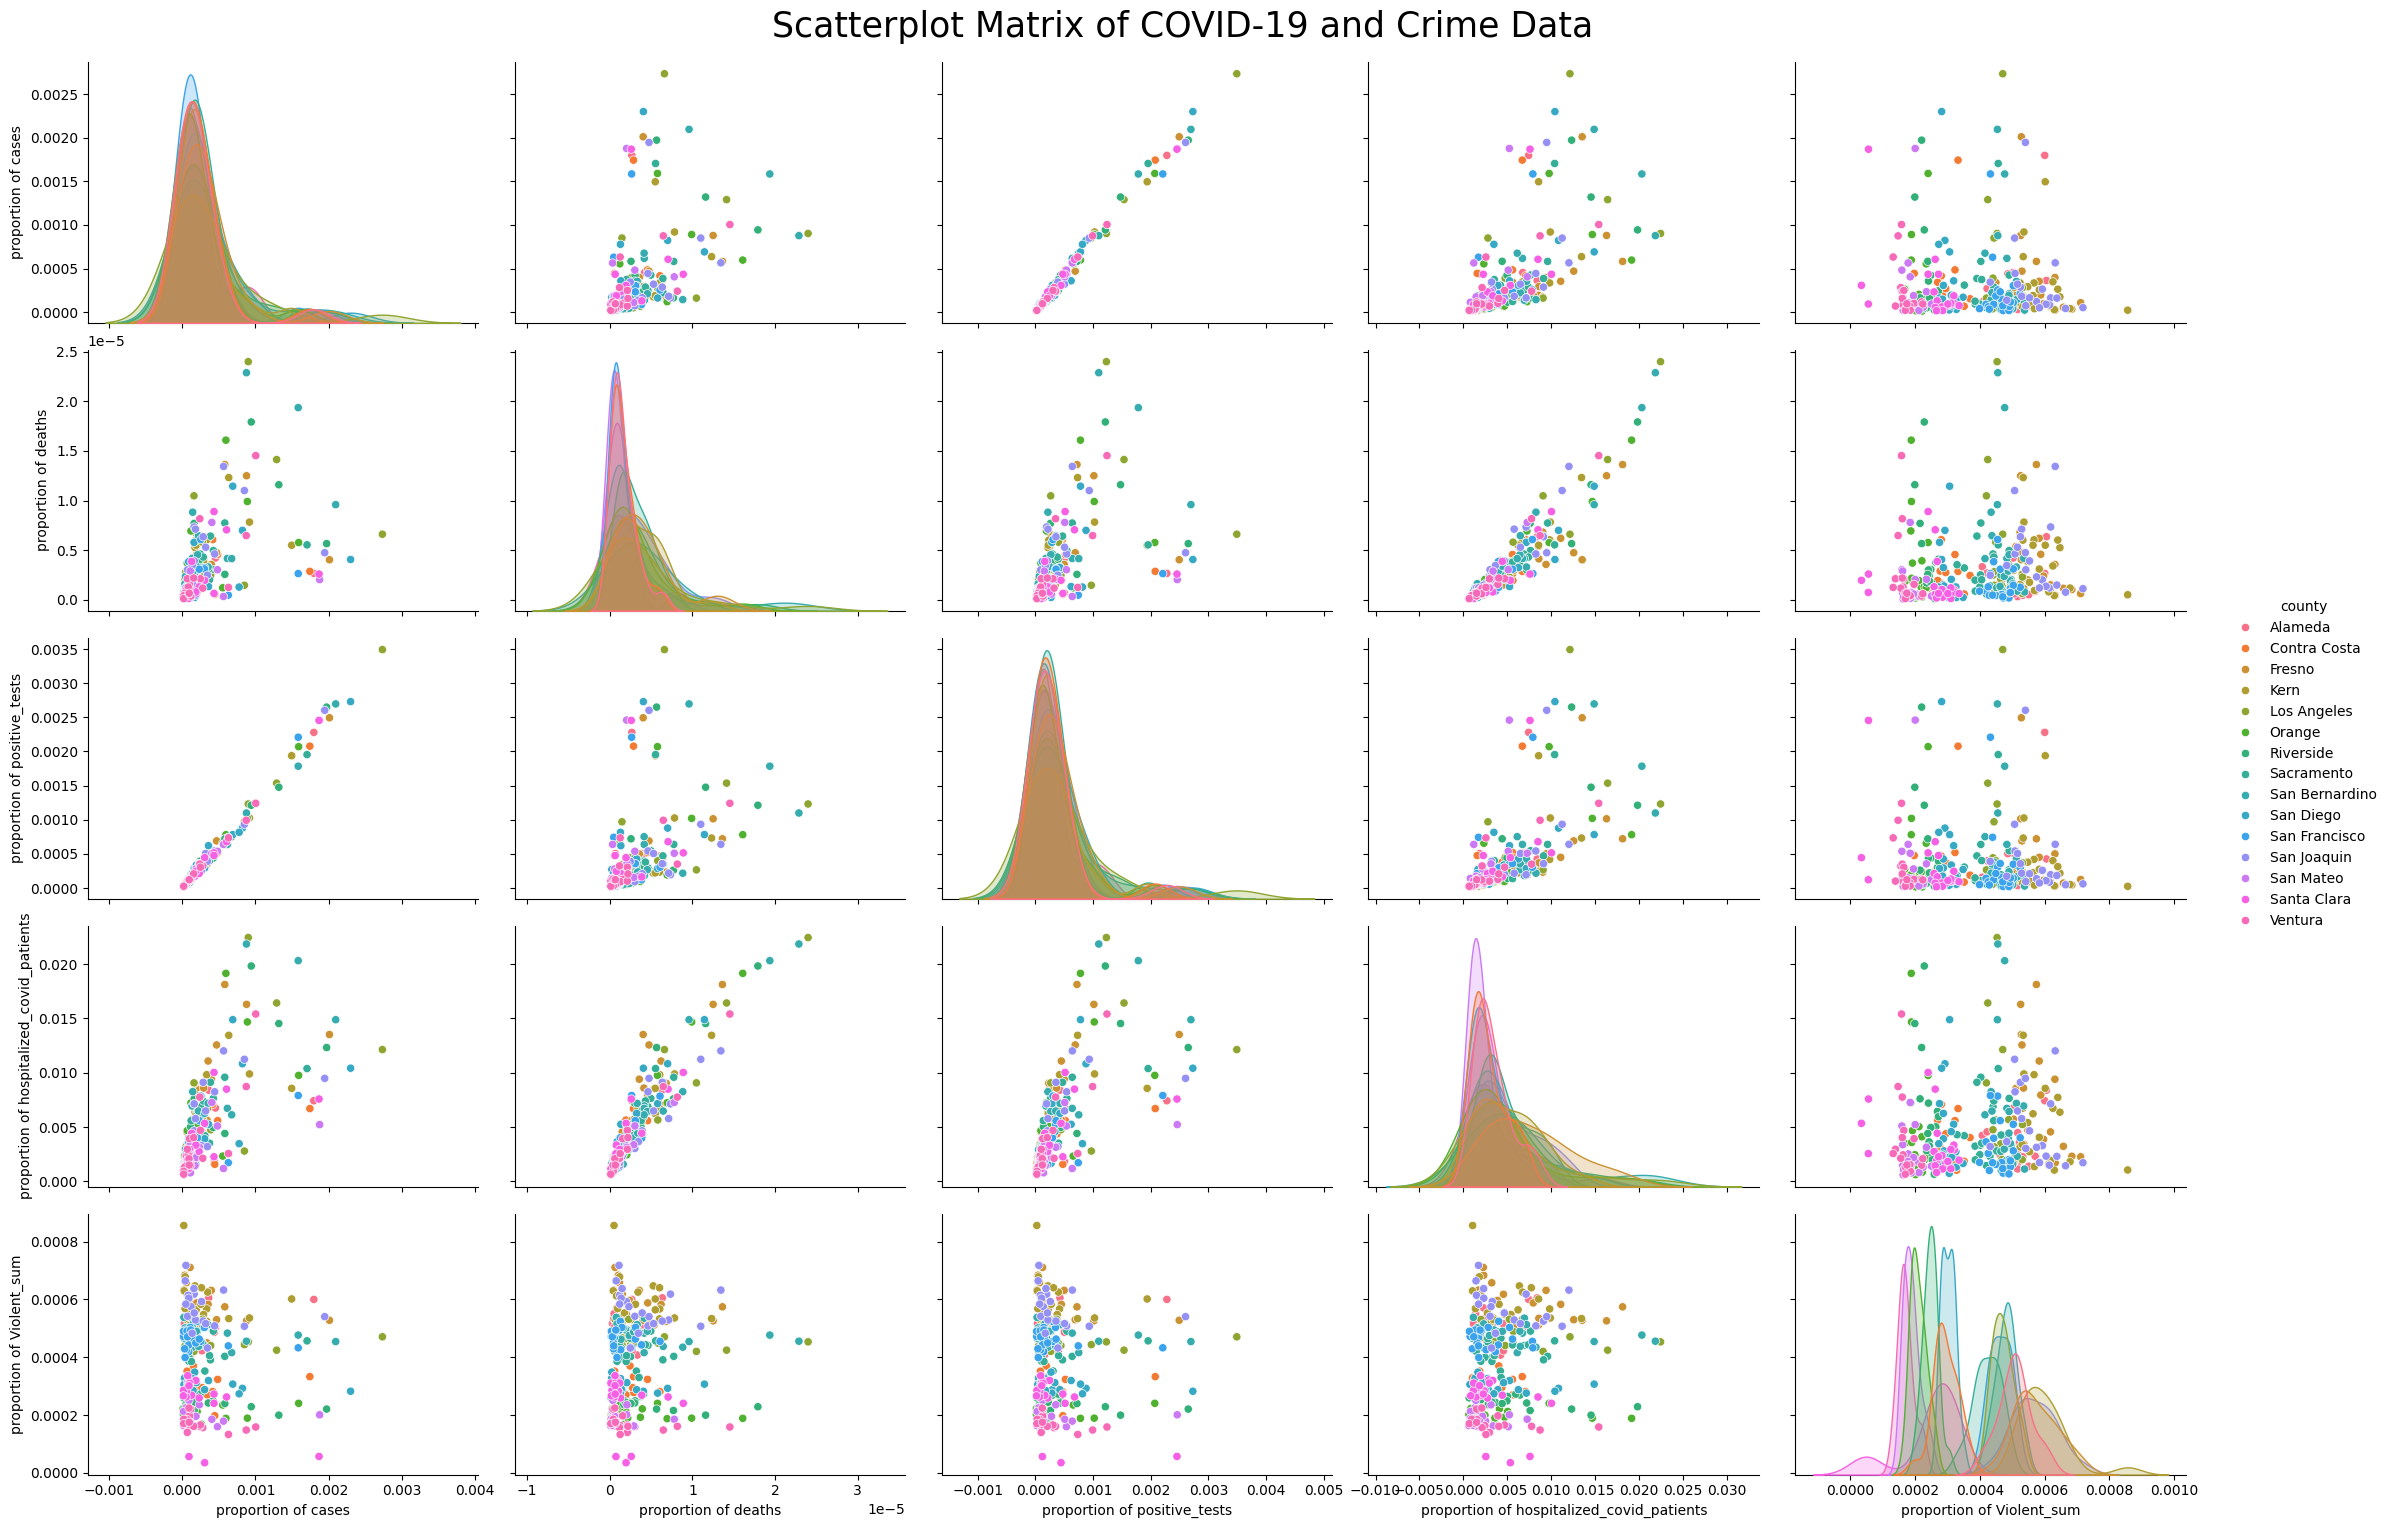

In [23]:
# creating a scatterplot matrix using proportions in the merged dataset
sns.pairplot(data[['proportion of cases', 'proportion of deaths', 'proportion of positive_tests', 'proportion of hospitalized_covid_patients', 'proportion of Violent_sum', 'county']], 
             hue='county',
             height=3,
             aspect=1.5
)
plt.gcf().suptitle('Scatterplot Matrix of COVID-19 and Crime Data', fontsize=25, y=1.02)

### Machine Learning - OLS Regression

In [24]:
outcome, predictors = patsy.dmatrices("percent_change_covid	~ percent_change_crime ", data = data)

mod = sm.OLS(outcome, predictors)
res_log = mod.fit()
print(res_log.summary())

                             OLS Regression Results                             
Dep. Variable:     percent_change_covid   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.3291
Date:                  Wed, 20 Mar 2024   Prob (F-statistic):              0.567
Time:                          16:57:54   Log-Likelihood:                -416.28
No. Observations:                   297   AIC:                             836.6
Df Residuals:                       295   BIC:                             843.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept   

<Axes: xlabel='percent_change_covid', ylabel='percent_change_crime'>

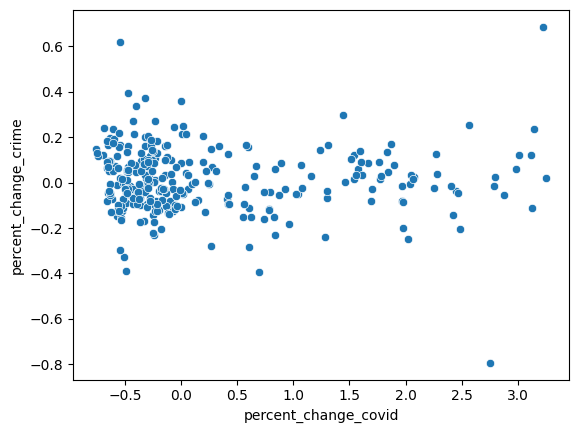

In [25]:
sns.scatterplot(x = "percent_change_covid", y= "percent_change_crime", data= data)

### Machine Learning Analysis:

To get the two variables in the linear regression, we did two things: 

1. Get the percent change for the Violent Sum per month of each county:
- We wanted to do this because each county has a different population, so we wanted to see the trends relative to each county, and how much they changed per month. So, we used the `.pct_change()` function to calculate that. 

2. Get the percent change for the COVID-19 trends per month of each county:
- We had similar reasoning as above to do this for the COVID trends. However, since there were many factors that led into the effect of COVID, we categorized this as the average of the sum of four categories: `cases`,`deaths`, `positive_tests`, `hospitalized_covid_patients`. Then, we got the percent change per month of each county, similar to the crime percent change, and used both of them to calculate upward or downward trends in COVID-19 Cases. 



After putting these into the OLS Regression, we see that we get a p-value of `0.567`. This shows that there doesn't seem to be much of a correlation between COVID trends and crime rates. 

# Ethics and Privacy

In regards to potential ethical concerns of this project, there may be various biases depending on the specific dataset used. For crime data, it is likely that datasets are not reflective of all the crimes committed in a specific county but rather only those reported by the police. When conducting our analyses, we need to be aware of this potential collection bias as certain crimes may be underreported or overreported due to factors like law enforcement, community awareness campaigns, recent events, etc. Additionally, we need to consider many potential confounding variables in our analysis; for example, crime rates can vary based on geographical and demographic factors like population density, socioeconomic status, and cultural influences. Any correlations or associations found from our analyses may be due to a range of factors that may not be directly identified through our datasets. Similarly, for COVID-19 data, it is likely that datasets are subject to testing and reporting biases that are influenced by the availability and accessibility to testing resources and healthcare facilities in certain regions and populations. Differences in case definitions, data collection methods, and reporting protocols may create variations in the data cross regions. Confounding variables like asymptomatic cases, pre-existing health conditions, and public health interventions can also skew the measures of the “impact” of COVID-19. Keeping these considerations in mind, we can closely review how data was collected to see if certain groups were potentially overrepresented or underrepresented in the dataset. We can also look for any inconsistencies, missing values, or data entry errors that potentially affect the integrity of the dataset and consider whether this is due to any systematic biases in data collection practices. Statistical techniques can also be used to detect patterns, outliers, and anomalies in the data and help control for confounding variables. Lastly, we can compare and cross-reference multiple datasets from different sources to validate our findings and identify potential biases.

In general, in regards to privacy, no Personal Identifiable Information is being used because the data collected are more generalized by region. We should also keep in consideration that many crime and COVID-19 datasets are collected and maintained by law enforcement agencies or the government and therefore may be subject to terms of use agreements, restricting how data can be accessed or shared. Another general issue with this topic is data transparency as we want to ensure that findings in this research study avoid selective reporting or manipulation of data to fit a particular narrative. To address this, we should work to address any potential blindspots and work to mitigate any dataset bias such as stereotype perpetuation and confirmation bias. Another issue to consider is fairness and equity as a potential concern is that analyzing crime data in correlation with COVID-19 impact may reveal disparities in the distribution of resources, access to healthcare, and exposure to risk factors across marginalized populations. In our analysis, we should consider potential unintended consequences and prevent data from being misinterpreted or used to justify any discriminatory practices or policies.

# Discussion and Conclusion

Unfortunately, as revealed from the analysis we did, we didn't have enough evidence to conclude that we can predict the rise or fall of crime rates based on the rise or fall of COVID-19 rates and effects. The p-value for the linear regression between the effect of Covid-19 and the violent crime rates in the 15 counties in California was 0.567, much larger than 0.05. Therefore, we failed to support our hypothesis. 

There are some reasons that might contribute to the failure of our original predictive hypothesis. First of all, there are many factors influencing the violent crime rates, and there might be some confounding variables in the correlation between COVID-19 and the violent crime rates. For example, socioeconomic factors might influence both COVID-19 and violent crime rates. To be more specific, areas with higher poverty rates or unemployment rates may have a higher probability of committing violent crimes and thus elevate the transmission rates of COVID-19. Due to the fact that we only chose the counties based on the population instead of randomization and we didn't consider other demographic information at all when selecting the targeted datasets, it might be possible that the lack of consideration of those factors contributes to the failure of supporting the hypothesis. Secondly, it might also be possible that the correlation between COVID-19 and violent crime rates is intrinsically weak. It might be intuitive that we may find some correlations between those two factors, but sometimes intuition can be wrong and not scientific. We saw this reflected in our scatterplot matrix as when looking at any of the COVID-19 variables with sum of violent crimes, there was indeed not much of a linear relationship. It could be possible that changes in temporal patterns, such as the long-term trends in crime rates, coincide with the fluctuations in COVID-19 rates, as our dataset only covered two years of data. Therefore, it can be either due to the quality/length of our dataset, or just the coincidence nature between the two factors. 

Despite the frustrating results, future studies might still want to investigate the factors contributing to the surged crime rates across the States and the discrepant findings of the violent crime rates in California. Future studies could explore additional variables, employ more data analysis techniques (due to our limited knowledge about machine learning models, we might not choose the most appropriate one), and extend the timeframe of data collection to gain a better understanding of the complex dynamics between COVID-19 and crime rates. Additionally, incorporating demographic information and socioeconomic indicators into the analysis could help disentangle the intertwined relationship between COVID-19 and violent crime.

Understanding the factors contributing to surged crime rates during the pandemic has practical implications. For example, policymakers should consider holistic approaches that address the socio-economic determinants of crime while mitigating the public health impacts of COVID-19. Targeted interventions aimed at vulnerable populations and communities disproportionately affected by both COVID-19 and crime can help alleviate the adverse consequences of the pandemic. Thus, the topic remains important for future research and may provide insight into emergency response to similar events in the future. 




# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.
- Lilian Xia: initial background & prior work, found some datasets, cleaned & analyzed vaccination dataset and the merged covid-19 dataset, made the slides for video presentataion, and the discussion and conclusion. 
- Marina Hu: worked on writing the ideal dataset portion for the project proposal, found some datasets as well, cleaned and analyzed and performed EDA on the COVID-19 cases data for data checkpoint, helped make a few slides for the video presentation, made/put together the final video through iMovies 
- Audrey Liang: Worked on the background and research questions for the proposal, finding datasets, cleaned and analyzed the crime dataset as well as data visualizations, ran the OLS Regression and wrote Machine Learning Analysis in the Final Project and Slides. 